In [38]:
!pip install konlpy

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [55]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
datas = pd.read_table('/content/drive/MyDrive/nsmc/nsmc.txt')
datas.sample(n=10)

,id,document,label
115653,2016213,"""이 영화를 알면 간첩""이라 할정도로 민망스러운 영화",0
79441,6131253,4부작인게너무아까웠다 이런드라마또나왔으면좋겠다 그래도이루어졌으면더좋았을걸...,1
167103,2108975,배는 너무 느려 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,0
163142,3598480,진짜 개 쓰레 기 영화 DVD방에서봣는데 이게뭐야 ㅅㅂ,0
187188,6977892,쓸데없는 죽음 고어물로 적합하지 않음,0
35064,4532395,"이 땅이 삶인 내 부모들의 연대기가 고스란히, 가장 힘들고 어려운 직업",1
173038,129240,ㅡ_ㅡ 최악임,0
193449,7619871,속편의 정석 빅사이즈속의 내용물부재,0
21472,9269482,연애의발견에서 성준보다 보게 되었는데요 정말 .. 너무 즐겁게 재밌게 잘보았어요!,1
47282,9246841,샘락웰의 천의 얼굴중 하나의 얼굴을 확인할 수 있는 영화 솔직히 이런역이 샘락엘에게...,1


In [39]:
steam = pd.read_table('/content/drive/MyDrive/nsmc/steam.txt')

In [57]:
shopping = pd.read_table('/content/drive/MyDrive/nsmc/naver_shopping.txt')

In [40]:
datas['document'] = datas['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
steam['doc'] = steam['doc'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
datas[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [59]:
shopping['doc']= shopping['doc'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
datas['document'] = datas['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
datas['document'].replace('', np.nan, inplace=True)

steam['doc'] = steam['doc'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
steam['doc'].replace('', np.nan, inplace=True)

print(datas.isnull().sum())

In [60]:
shopping['doc'] = shopping['doc'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
shopping['doc'].replace('', np.nan, inplace=True)

In [9]:
docu = datas['document'].astype('str')
steamdoc = steam['doc'].astype('str')

In [61]:
shoppingdoc = shopping['doc'].astype('str')

In [41]:
steam['doc'].replace('', np.nan, inplace=True)
steamdoc = steam['doc'].astype('str')

In [68]:
shoppinglabels = np.array(shoppinglabels)
shoppinglabels = np.select(shoppinglabels

In [10]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt = Okt()

questions = []
for sentence in tqdm(docu):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    questions.append(stopwords_removed_sentence)

100%|██████████| 200000/200000 [12:26<00:00, 267.95it/s]


In [42]:
steamdocs = []
for sentence in tqdm(steamdoc):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    steamdocs.append(stopwords_removed_sentence)

100%|██████████| 100000/100000 [06:44<00:00, 247.09it/s]


In [62]:
shoppingdocs = []
for sentence in tqdm(shoppingdoc):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    shoppingdocs.append(stopwords_removed_sentence)

100%|██████████| 200000/200000 [16:21<00:00, 203.67it/s]


In [11]:
print(questions[:3])

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'], ['디자인', '을', '배우다', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '끝', '까지', '열정', '을', '지키다', '노라노', '같다', '전통', '있다', '저', '같다', '사람', '꿈', '을', '꾸다', '이루다', '나가다', '수', '있다', '것', '감사하다'], ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고']]


In [12]:
labels = datas['label']

In [43]:
steamlabels = steam['label']

In [69]:
shoppinglabels = shopping['label']

In [13]:
print(set(labels))

{0, 1}


In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions)

In [15]:
print(tokenizer.word_index)

{'영화': 1, '보다': 2, '을': 3, '없다': 4, '이다': 5, '있다': 6, '좋다': 7, '너무': 8, '다': 9, '정말': 10, '재밌다': 11, '되다': 12, '만': 13, '적': 14, '진짜': 15, '같다': 16, '로': 17, '아니다': 18, '않다': 19, '점': 20, '에서': 21, '만들다': 22, '나오다': 23, '평점': 24, '연기': 25, '것': 26, '최고': 27, '내': 28, '그': 29, '나': 30, '인': 31, '안': 32, '생각': 33, '못': 34, '스토리': 35, '왜': 36, '드라마': 37, '게': 38, '감동': 39, '사람': 40, '보고': 41, '이렇다': 42, '아깝다': 43, '말': 44, '고': 45, '더': 46, '때': 47, 'ㅋㅋ': 48, '배우': 49, '감독': 50, '아': 51, '재미있다': 52, '그냥': 53, '거': 54, '요': 55, '재미': 56, '시간': 57, '내용': 58, '까지': 59, '중': 60, '주다': 61, '뭐': 62, '재미없다': 63, '자다': 64, '하고': 65, '지루하다': 66, '쓰레기': 67, '수': 68, '네': 69, '가다': 70, '들다': 71, '모르다': 72, '그렇다': 73, '싶다': 74, '지': 75, '사랑': 76, '작품': 77, '알다': 78, '볼': 79, '다시': 80, '하나': 81, '마지막': 82, '이건': 83, '저': 84, '정도': 85, 'ㅠㅠ': 86, '오다': 87, 'ㅋ': 88, '완전': 89, '많다': 90, '처음': 91, 'ㅋㅋㅋ': 92, '장면': 93, '액션': 94, '주인공': 95, '이렇게': 96, '안되다': 97, '걸': 98, '차다': 99, '나다': 100, '최악': 101, '하': 

In [19]:
threshold = 1
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 49646
등장 빈도가 0번 이하인 희귀 단어의 수: 0
단어 집합에서 희귀 단어의 비율: 0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


In [20]:
tokenizer = Tokenizer(49646) 
tokenizer.fit_on_texts(questions)
questions = tokenizer.texts_to_sequences(questions)

In [45]:
steamdocs = tokenizer.texts_to_sequences(steamdocs)

In [64]:
shoppingdocs = tokenizer.texts_to_sequences(shoppingdocs)

In [21]:
print(questions[:3])

[[177, 47, 41, 105, 80, 2, 11, 48], [3652, 3, 479, 1466, 1377, 7187, 29, 28385, 4700, 3, 1009, 1346, 1166, 5943, 1751, 405, 385, 759, 29, 589, 585, 113, 59, 1378, 3, 1141, 28386, 16, 4700, 6, 84, 16, 40, 621, 3, 1457, 1429, 478, 68, 6, 26, 660], [6971, 261, 142, 4701, 59, 136, 81, 4, 27]]


리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.724695


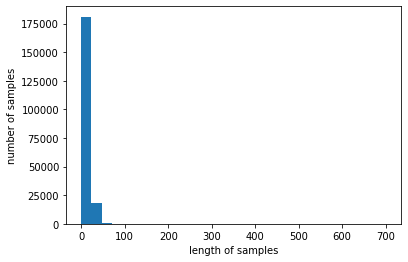

In [22]:
print('리뷰의 최대 길이 :',max(len(question) for question in questions))
print('리뷰의 평균 길이 :',sum(map(len, questions))/len(questions))
plt.hist([len(question) for question in questions], bins=30, range=(0, 700))
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [26]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

max_len = 30
below_threshold_len(max_len, questions)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.2545


In [27]:
questions = pad_sequences(questions, maxlen=30)

In [47]:
steamdocs = pad_sequences(steamdocs, maxlen = 30)

In [65]:
shoppingdocs = pad_sequences(shoppingdocs, maxlen = 30)

In [31]:
from sklearn.model_selection import train_test_split
                                                         
x_train, x_val, y_train, y_val = train_test_split(questions, labels, test_size=0.2, random_state=100)

In [33]:
model = Sequential()
model.add(Embedding(49646, embedding_dim, input_length=30))
model.add(GRU(256))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_data = (x_val, y_val))

Epoch 1/10
2499/2500 [============================>.] - ETA: 0s - loss: 0.3764 - acc: 0.8290
Epoch 00001: val_acc improved from -inf to 0.84962, saving model to best_model.h5
2500/2500 [==============================] - 16s 5ms/step - loss: 0.3764 - acc: 0.8290 - val_loss: 0.3394 - val_acc: 0.8496
Epoch 2/10
2495/2500 [============================>.] - ETA: 0s - loss: 0.3183 - acc: 0.8626
Epoch 00002: val_acc improved from 0.84962 to 0.85892, saving model to best_model.h5
2500/2500 [==============================] - 13s 5ms/step - loss: 0.3183 - acc: 0.8626 - val_loss: 0.3253 - val_acc: 0.8589
Epoch 3/10
2496/2500 [============================>.] - ETA: 0s - loss: 0.2920 - acc: 0.8769
Epoch 00003: val_acc did not improve from 0.85892
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2919 - acc: 0.8769 - val_loss: 0.3244 - val_acc: 0.8589
Epoch 4/10
2498/2500 [============================>.] - ETA: 0s - loss: 0.2672 - acc: 0.8910
Epoch 00004: val_acc did not improve fr

In [34]:
model2 = Sequential()
model2.add(Embedding(49646, embedding_dim, input_length=30))
model2.add(LSTM(256))
model2.add(Dropout(rate=0.2))
model2.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model2.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model2.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_data = (x_val, y_val))

Epoch 1/10
2498/2500 [============================>.] - ETA: 0s - loss: 0.3806 - acc: 0.8272
Epoch 00001: val_acc improved from -inf to 0.84782, saving model to best_model2.h5
2500/2500 [==============================] - 16s 6ms/step - loss: 0.3806 - acc: 0.8272 - val_loss: 0.3475 - val_acc: 0.8478
Epoch 2/10
2498/2500 [============================>.] - ETA: 0s - loss: 0.3217 - acc: 0.8611
Epoch 00002: val_acc improved from 0.84782 to 0.85135, saving model to best_model2.h5
2500/2500 [==============================] - 14s 6ms/step - loss: 0.3217 - acc: 0.8611 - val_loss: 0.3460 - val_acc: 0.8514
Epoch 3/10
2494/2500 [============================>.] - ETA: 0s - loss: 0.2955 - acc: 0.8758
Epoch 00003: val_acc improved from 0.85135 to 0.85965, saving model to best_model2.h5
2500/2500 [==============================] - 14s 6ms/step - loss: 0.2955 - acc: 0.8758 - val_loss: 0.3217 - val_acc: 0.8597
Epoch 4/10
2494/2500 [============================>.] - ETA: 0s - loss: 0.2739 - acc: 0.8874
E

In [37]:
model3 = Sequential()
model3.add(Embedding(49646, embedding_dim, input_length=30))
model3.add(SimpleRNN(256))
model3.add(Dropout(0.2))
model3.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model3.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model3.fit(x_train, y_train, epochs=10, callbacks=[es, mc], batch_size=64, validation_data = (x_val, y_val))

Epoch 1/10
2499/2500 [============================>.] - ETA: 0s - loss: 0.4448 - acc: 0.7895
Epoch 00001: val_acc improved from -inf to 0.82885, saving model to best_model3.h5
2500/2500 [==============================] - 43s 17ms/step - loss: 0.4448 - acc: 0.7895 - val_loss: 0.3882 - val_acc: 0.8288
Epoch 2/10
2499/2500 [============================>.] - ETA: 0s - loss: 0.3844 - acc: 0.8322
Epoch 00002: val_acc improved from 0.82885 to 0.83435, saving model to best_model3.h5
2500/2500 [==============================] - 42s 17ms/step - loss: 0.3844 - acc: 0.8322 - val_loss: 0.3721 - val_acc: 0.8343
Epoch 3/10
2499/2500 [============================>.] - ETA: 0s - loss: 0.3644 - acc: 0.8417
Epoch 00003: val_acc improved from 0.83435 to 0.83653, saving model to best_model3.h5
2500/2500 [==============================] - 42s 17ms/step - loss: 0.3644 - acc: 0.8417 - val_loss: 0.3719 - val_acc: 0.8365
Epoch 4/10
2499/2500 [============================>.] - ETA: 0s - loss: 0.3511 - acc: 0.849

In [51]:
grumodel = load_model('best_model.h5')
lstmmodel = load_model("best_model2.h5")
rnnmodel = load_model("best_model3.h5")

### Steam data

In [52]:
grumodel.evaluate(steamdocs, steamlabels, batch_size = 64)

1563/1563 [==============================] - 5s 3ms/step - loss: 0.6239 - acc: 0.6970


[0.623943030834198, 0.6970300078392029]

In [53]:
lstmmodel.evaluate(steamdocs, steamlabels, batch_size = 64)

1563/1563 [==============================] - 5s 3ms/step - loss: 0.5994 - acc: 0.7069


[0.5993563532829285, 0.7068700194358826]

In [54]:
rnnmodel.evaluate(steamdocs, steamlabels, batch_size = 64)

1563/1563 [==============================] - 7s 4ms/step - loss: 0.6753 - acc: 0.6848


[0.6753212213516235, 0.6848499774932861]

###네이버 쇼핑 데이터

In [73]:
grumodel.evaluate(shoppingdocs, shoppinglabels, batch_size = 64)

3125/3125 [==============================] - 9s 3ms/step - loss: 0.4772 - acc: 0.7742


[0.4771883487701416, 0.7741900086402893]

In [74]:
lstmmodel.evaluate(shoppingdocs, shoppinglabels, batch_size = 64)

3125/3125 [==============================] - 9s 3ms/step - loss: 0.5025 - acc: 0.7564


[0.5024756193161011, 0.7563999891281128]

In [75]:
rnnmodel.evaluate(shoppingdocs, shoppinglabels, batch_size = 64)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.5003 - acc: 0.7628


[0.5002728700637817, 0.7628099918365479]